In [644]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 
import numpy as np

In [645]:
from scrinet import fits

In [646]:
psf_coords = np.loadtxt("psf_phase_x.txt")
psf_y = np.loadtxt("psf_phase_y.txt")

# psf_coords = np.loadtxt("psf_amp_x.txt")
# psf_y = np.loadtxt("psf_amp_y.txt")

In [647]:
psf_coords[0]

array([ 0.1600004 , -0.00686666,  0.79998044])

In [648]:
psf_coords.shape

(40, 3)

In [649]:
psf_y.shape

(40, 5)

In [ ]:
plt.figure()
plt.scatter(psf_coords[:,1], psf_y[:,0])

In [ ]:
psf_coords[0]

In [ ]:
psf_y.shape

In [ ]:
X = psf_coords.copy()
y = psf_y.copy()[:,0]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# note this is an old functiona and should be replaced with the new one
scale = False
if scale:
    X, y = fits.scale.scale_data(X, y)

In [ ]:
plt.figure()
plt.scatter(X[:,1], y)

In [ ]:
max_degs = fits.poly.generate_degrees([3,2,2], max_deg_total=3*3)

In [ ]:
len(max_degs)

In [17]:
for i, deg in enumerate(max_degs):
    print(f"{i}, {deg}")

0, [0 0 0]
1, [0 0 1]
2, [0 0 2]
3, [1 0 0]
4, [1 0 1]
5, [1 0 2]
6, [2 0 0]
7, [2 0 1]
8, [2 0 2]
9, [3 0 0]
10, [3 0 1]
11, [3 0 2]
12, [0 1 0]
13, [0 1 1]
14, [0 1 2]
15, [1 1 0]
16, [1 1 1]
17, [1 1 2]
18, [2 1 0]
19, [2 1 1]
20, [2 1 2]
21, [3 1 0]
22, [3 1 1]
23, [3 1 2]
24, [0 2 0]
25, [0 2 1]
26, [0 2 2]
27, [1 2 0]
28, [1 2 1]
29, [1 2 2]
30, [2 2 0]
31, [2 2 1]
32, [2 2 2]
33, [3 2 0]
34, [3 2 1]
35, [3 2 2]


In [18]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False)

In [19]:
np.array(t_AICs).argmin()

35

In [20]:
np.array(t_AICcs).argmin()

27

In [21]:
np.array(t_BICs).argmin()

27

In [22]:
lowest_deg_t

27

In [23]:
best_deg_idx

27

In [24]:
max_degs[best_deg_idx]

array([1, 2, 0])

(1.0, 639.0737562570364)

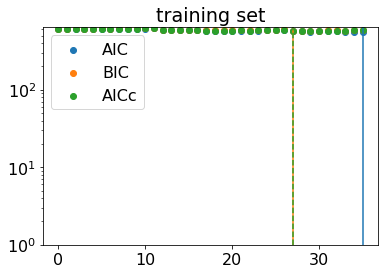

In [25]:
plt.figure()
plt.scatter(range(len(t_AICs)), t_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), t_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), t_AICcs, label='AICc')

plt.axvline(np.argmin(t_AICs), c='C0')
plt.axvline(np.argmin(t_BICs), c='C1')
plt.axvline(np.argmin(t_AICcs), ls='--', c='C2')

plt.legend()
plt.title('training set')

plt.yscale('log')
plt.ylim(1e0)

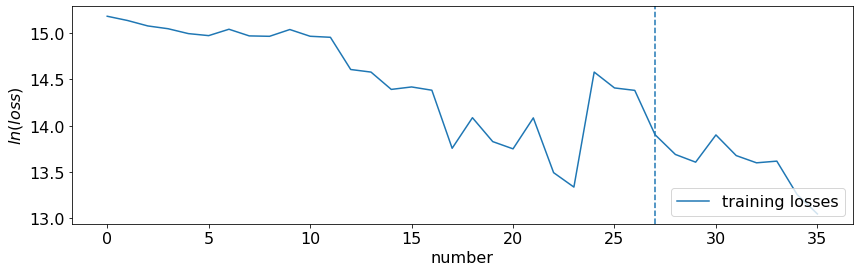

In [26]:
plt.figure(figsize=(14,4))
plt.plot(range(len(t_AICs)), np.log(t_losses), label='training losses')
plt.legend(loc='lower right')
plt.xlabel('number')
plt.ylabel(r'$ln(loss)$')

plt.axvline(lowest_deg_t, c='C0', ls='--')

In [27]:
tloss = best_lr.loss(X, y, method='sum-of-squares')

In [28]:
tloss

1091441.9567270654

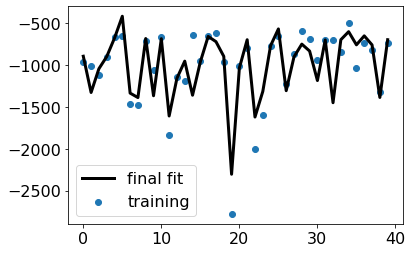

In [29]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), best_lr.predict(X), lw=3, c='k', label='final fit')
plt.legend()

# specific fit

In [30]:
lr = fits.poly.LinearPolynomialBasisRegression()
lr.fit(X, y, maxdegs=[3,2,2], max_deg_total=4)

In [31]:
lr.loss(X, y)

182849.22361257306

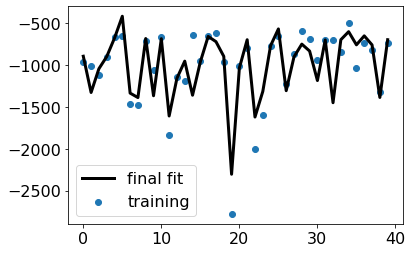

In [32]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), best_lr.predict(X), lw=3, c='k', label='final fit')
plt.legend()

In [33]:
# example how to use weights and build design matrix

In [34]:
new_lr = fits.poly.LinearPolynomialBasisRegression()

In [35]:
new_lr.degrees = lr.degrees

In [36]:
new_lr.w_ml = lr.w_ml

In [37]:
new_lr.predict(X) - lr.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [38]:
X.shape

(40, 3)

In [39]:
X[0]

array([ 0.1600004 , -0.00686666,  0.79998044])

In [40]:
new_lr.predict(X)[0]

-765.1317084032187

In [41]:
X[0].reshape(1,-1).shape

(1, 3)

In [42]:
new_lr.predict(X[0].reshape(1,-1))

array([-765.13170854])

In [43]:
new_lr.predict(np.array([[0.222, np.cos( 25 * np.pi / 180), 0.4]]))

array([-1771.80709493])

# try sklearn LASSO, Ridge, etc

In [44]:
# this https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py
# showed me how to make a pipeline with PolynomialFeatures and a fitter / regulariser

In [45]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [47]:
X.shape

(40, 3)

In [48]:
for xx in [X_train, X_test, y_train, y_test]:
    print(xx.shape)

(32, 3)
(8, 3)
(32,)
(8,)


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# model = make_pipeline(PolynomialFeatures(degree=2), ElasticNet())
model = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.001, max_iter=10e5))
# model = make_pipeline(PolynomialFeatures(degree=3), Ridge())
model.fit(X_train, y_train)
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

/home/sebastian.khan/.conda/envs/puck/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19214.44487781467, tolerance: 747.3211772562029
  positive)


In [50]:
model.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=10, include_bias=True, interaction_only=False,
                    order='C'),
 'lasso': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False)}

In [51]:
model['polynomialfeatures'].get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5',
 'x0^6',
 'x0^5 x1',
 'x0^5 x2',
 'x0^4 x1^2',
 'x0^4 x1 x2',
 'x0^4 x2^2',
 'x0^3 x1^3',
 'x0^3 x1^2 x2',
 'x0^3 x1 x2^2',
 'x0^3 x2^3',
 'x0^2 x1^4',
 'x0^2 x1^3 x2',
 'x0^2 x1^2 x2^2',
 'x0^2 x1 x2^3',
 'x0^2 x2^4',
 'x0 x1^5',
 'x0 x1^4 x2',
 'x0 x1^3 x2^2',
 'x0 x1^2 x2^3',
 'x0 x1 x2^4',
 'x0 x2^5',
 'x1^6',
 'x1^5 x2',
 'x1^4 x2^2

In [52]:
n_features = len(model['polynomialfeatures'].get_feature_names())
print(n_features)

286


In [54]:
# model['elasticnet'].coef_

In [55]:
lasso_coeff_mask = model['lasso'].coef_ != 0

In [56]:
list(np.array(model['polynomialfeatures'].get_feature_names())[lasso_coeff_mask])

['x0',
 'x1',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^2 x2',
 'x0 x1^2',
 'x1^3',
 'x1 x2^2',
 'x2^3',
 'x0^2 x1 x2',
 'x1^3 x2',
 'x0^2 x1 x2^2',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1 x2^3',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x0 x1^4 x2',
 'x0 x1^3 x2^2',
 'x0 x1^2 x2^3',
 'x1^6',
 'x1^3 x2^3',
 'x1 x2^5',
 'x0^2 x1^5',
 'x0 x1^3 x2^3',
 'x1^5 x2^2',
 'x1^3 x2^4',
 'x0^2 x1^6',
 'x1^5 x2^3',
 'x1^3 x2^5',
 'x0 x1^8',
 'x1^9',
 'x1^7 x2^2',
 'x1^5 x2^4',
 'x1^3 x2^6',
 'x0 x1^7 x2^2',
 'x1^10',
 'x1^9 x2',
 'x1^8 x2^2',
 'x1^7 x2^3',
 'x1^5 x2^5']

In [59]:
coeff_used = np.sum(model['lasso'].coef_!=0)

In [60]:
coeff_used

47

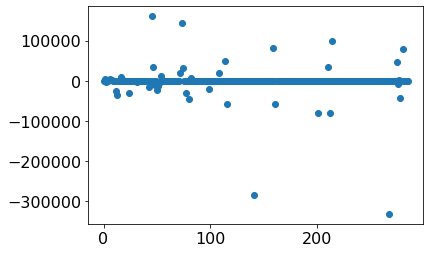

In [62]:
plt.figure()
# plt.scatter(range(n_features), model['elasticnet'].coef_)
plt.scatter(range(n_features), model['lasso'].coef_)
# plt.scatter(range(n_features), model['ridge'].coef_)

In [63]:
yhat_train.shape

(32,)

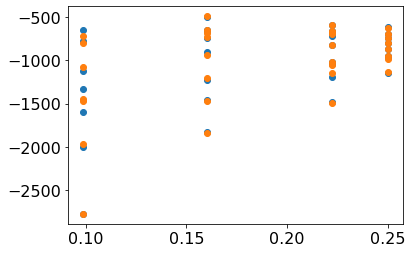

In [64]:
plt.figure()
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_train[:,0], yhat_train)


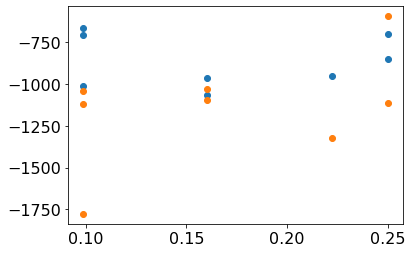

In [65]:
plt.figure()
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], yhat_test)


# main function

In [66]:
np.where(t_AICs == np.sort(t_AICs)[-5])[0][0]

1

In [67]:
np.where(t_AICs == np.sort(t_AICs)[-5])

(array([1]),)

In [68]:
np.sort(t_AICs)[-5]

611.4281585223937

In [673]:
def fit(X, y, title, maxdeg=3, scaleX=False, scaleY=False, alpha=0.01, degree=3):
    
    if scaleX:
        X = X.copy()
        X_scalers = fits.scale.make_scalers(X)
        X = fits.scale.apply_scaler(X, X_scalers)
#         self.save_X_scalers(os.path.join(self.outdir, "X_scalers"))
    if scaleY:
        y = y.copy()
        Y_scalers = fits.scale.make_scalers(y)
        y = fits.scale.apply_scaler(y, Y_scalers)
#         save_Y_scalers(os.path.join(self.outdir, "Y_scalers"))  


#     max_degs = fits.poly.generate_degrees([maxdeg, maxdeg, 2], max_deg_total=3*3)
#     best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
#         fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False, method='RMSE')

#     best_lr = fits.poly.LinearPolynomialBasisRegression()
#     best_lr.fit(X, y, maxdegs=[2,2,2], max_deg_total=2)


#     print(X.shape)
#     print(y.shape)
#     model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=alpha, max_iter=10e6))
    model = make_pipeline(PolynomialFeatures(degree=degree), Lasso(alpha=alpha, max_iter=10e6))
#     model = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=alpha, max_iter=10e6))
#     model = make_pipeline(PolynomialFeatures(degree=5), Lasso(alpha=alpha, max_iter=10e6))
#     model = make_pipeline(PolynomialFeatures(degree=6), Lasso(alpha=alpha, max_iter=10e6))
#     model = make_pipeline(PolynomialFeatures(degree=4), Ridge())
#     model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept=True))
#     model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression(fit_intercept=True))
    model.fit(X, y)
#     yhat = model.predict(X)[..., np.newaxis]
    yhat = model.predict(X).reshape(-1, 1)

#     best_lr = fits.poly.LinearPolynomialBasisRegression()
#     best_lr.fit(X, y, maxdegs=[2,2,2])

#     print(f"best degs: {max_degs[best_deg_idx]}")
    
#     if scaleX:
#         X = fits.scale.apply_scaler(X, X_scalers)

#     print(f"degs: {best_lr.degrees}")

#     yhat = best_lr.predict(X)

    if scaleY:
        y = fits.scale.apply_inverse_scaler(y, Y_scalers)
        yhat = fits.scale.apply_inverse_scaler(yhat, Y_scalers)

    if scaleX:
        X = fits.scale.apply_inverse_scaler(X, X_scalers)
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    labels = ['eta', 'cos(theta)', 'chi']
    fig.suptitle(title)
    for i in range(len(labels)):

        axes[i].scatter(X[:,i], y, label='training')
        axes[i].scatter(X[:,i], yhat, label='final fit', marker='x', s=100)
        axes[i].set_xlabel(labels[i])
    axes[0].legend()
#     axes[3].scatter(range(len(y)), 100*(y-yhat)/y)
    axes[3].scatter(range(len(y)), (y-yhat))
#     axes[3].set_title('% difference')
    axes[3].set_title('difference')
    
    
    axes[4].scatter(range(len(y)), y)
    axes[4].scatter(range(len(y)), yhat, marker='x', s=100)
    
#     axes[3].scatter(range(len(y)), (y-yhat))
#     axes[3].set_title('difference')

#     axes[3].set_ylim(-30,30)
        
    plt.show()
    plt.close()
    
    if scaleX and not scaleY:
        return model, X_scalers
    elif scaleY and not scaleX:
        return model, Y_scalers
    elif scaleX and scaleY:
        return model, X_scalers, Y_scalers
    else: 
        return model

In [674]:
# X = psf_coords.copy()
# y = psf_y.copy()[:,0]

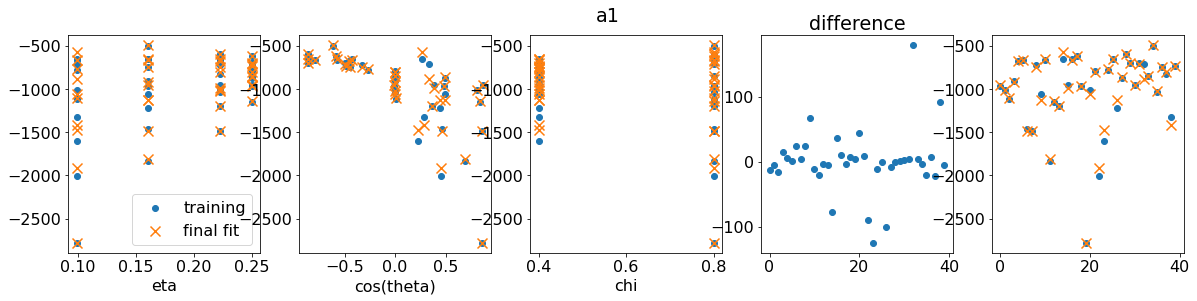

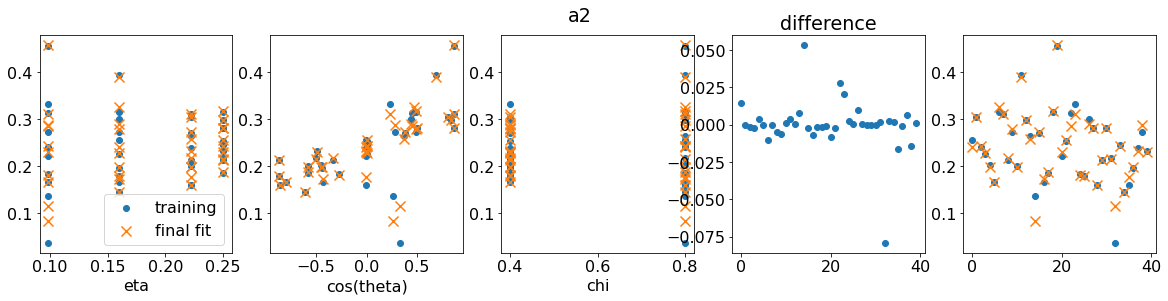

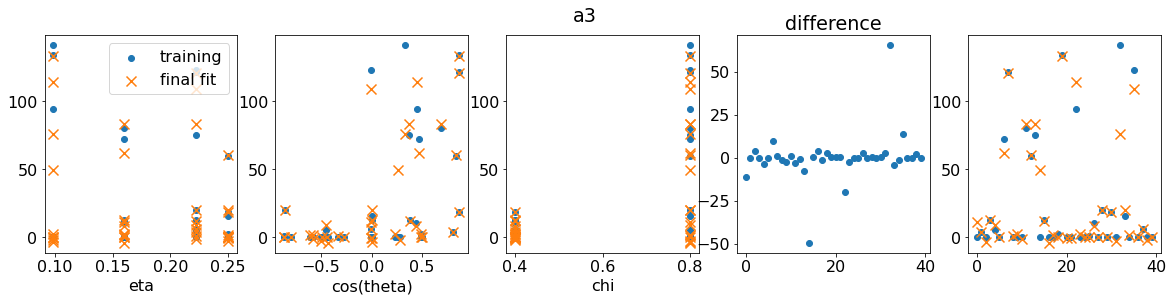

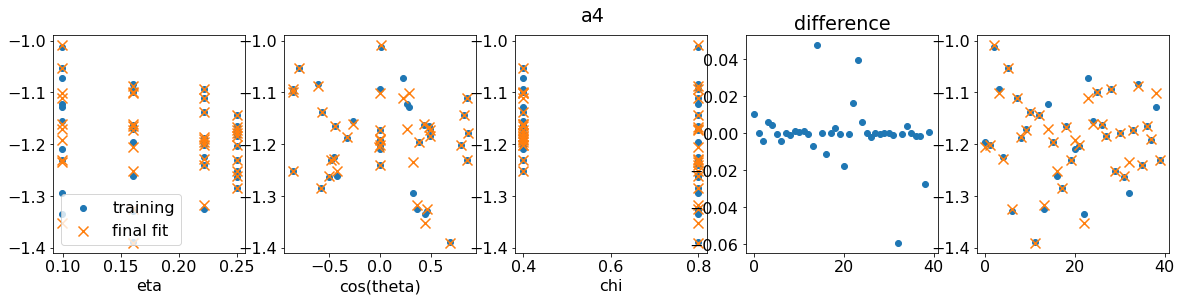

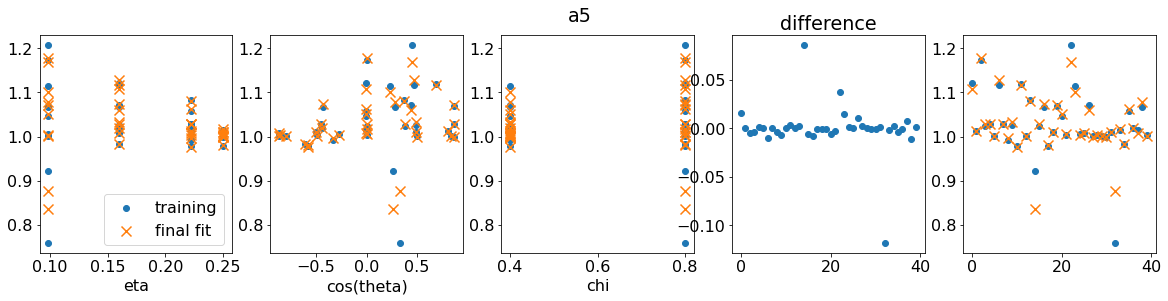

CPU times: user 14.6 s, sys: 39.4 ms, total: 14.7 s
Wall time: 14.7 s


In [679]:
%%time
y_fits = []
X_scalers = []
Y_scalers = []
maxdegs=[3,4,4,4,4]
suptitles = ['a1', 'a2', 'a3', 'a4', 'a5']

degree=7

# alpha = 0.01
alpha = 0.001
# alpha = 0.0001
# alpha = 0.00001


for i in range(psf_y.shape[1]):
    
    tmp_fit, tmp_X_scalers, tmp_Y_scalers = fit(psf_coords, psf_y[:,i].reshape(-1,1), title=suptitles[i], maxdeg=maxdegs[i], scaleX=True, scaleY=True, alpha=alpha, degree=degree)
    
    y_fits.append(tmp_fit)
    X_scalers.append(tmp_X_scalers)
    Y_scalers.append(tmp_Y_scalers)

#     tmp_fit = fit(psf_coords, psf_y[:,i].reshape(-1,1), title=suptitles[i], maxdeg=maxdegs[i], alpha=alpha)
#     y_fits.append(tmp_fit)


In [680]:
y_fits[0]['lasso'].coef_

array([ 0.00000000e+00,  0.00000000e+00, -3.67686533e-01, -0.00000000e+00,
        0.00000000e+00,  1.60038124e-01, -1.04955679e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.38216923e-01, -0.00000000e+00, -1.03700450e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.20545209e-02,
        7.48946834e-02, -3.34996875e-02, -0.00000000e+00, -1.49142312e-01,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.68897998e-01,  5.42107328e-02,
       -0.00000000e+00,  6.24369760e-02, -0.00000000e+00, -0.00000000e+00,
       -2.05219252e-01, -

In [552]:
# y_fits[0]['ridge'].coef_

# 3d plot

In [553]:
psf_coords.shape

(40, 3)

In [554]:
import phenom

In [555]:
phenom.q_from_eta(psf_coords[:,0].min())

8.000005142880232

In [556]:
phenom.q_from_eta(psf_coords[:,0].max())

1.0

In [557]:
print(psf_coords[:,1].min())
print(psf_coords[:,1].max())

-0.8642922150507487
0.8654553970807161


In [558]:
print(np.arccos(psf_coords[:,1].min()) * 180/np.pi)
print(np.arccos(psf_coords[:,1].max()) * 180/np.pi)

149.80198347331574
30.06525361079119


In [559]:
print(psf_coords[:,2].min())
print(psf_coords[:,2].max())

0.39999021665268175
0.7999888184432261


In [560]:
from mpl_toolkits.mplot3d import Axes3D

In [561]:
def model_predict(model, X, X_scalers, Y_scalers):
    X = fits.scale.apply_scaler(X, X_scalers)
    yhat = model.predict(X).reshape(-1,1)
    return fits.scale.apply_inverse_scaler(yhat, Y_scalers)

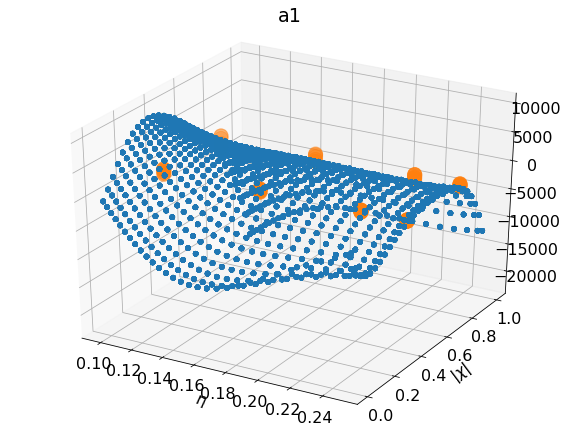

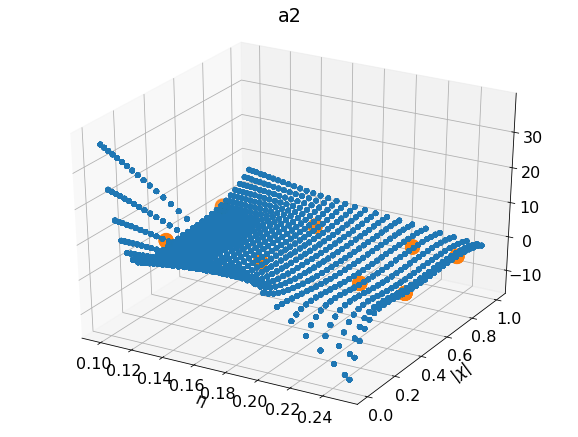

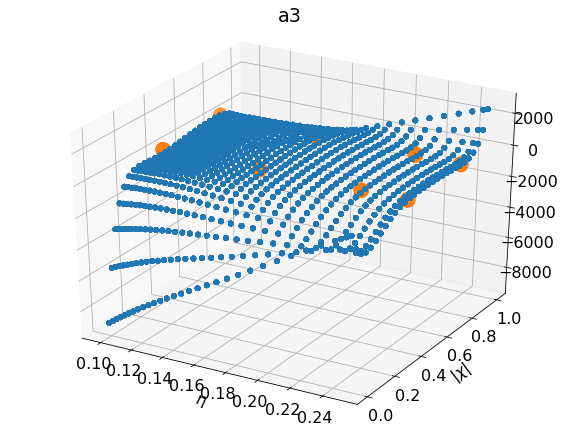

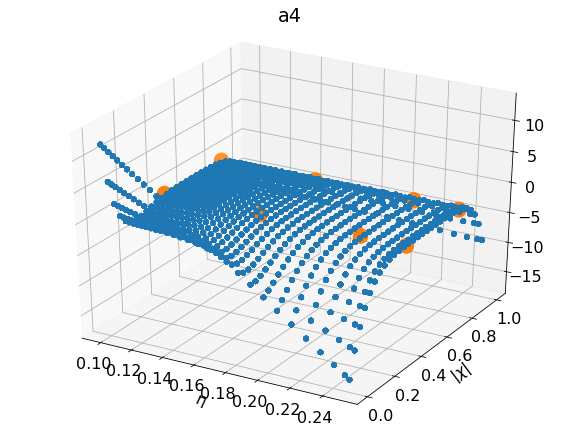

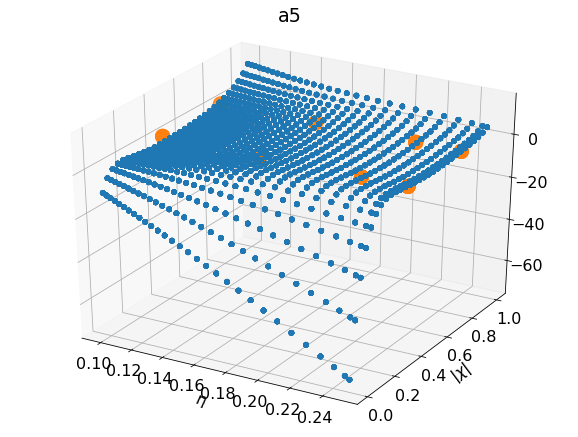

In [681]:
num = 30 
# mass-ratio
qq = np.linspace(1, 8, num)
# eta
ee = phenom.eta_from_q(qq)
# cos(theta)
# tt = np.cos(np.linspace(0, 180, num)*np.pi/180)
tt = np.array([np.cos(45 * np.pi/180)] * num)
# spin mag
cc = np.linspace(0,1,num)
# cc = np.array([0.4] * num)

xx, yy, zz = np.meshgrid(ee, tt, cc)
xx = xx.ravel()
yy = yy.ravel()
zz = zz.ravel()

XYZ = np.array(list(zip(xx,yy,zz)))

labels=['a1','a2','a3','a4','a5']
for idx in range(5):
    yhat_3d = model_predict(y_fits[idx], XYZ, X_scalers[idx], Y_scalers[idx])
    # XY_subspace = XYZ[:,[0,1]]
    XY_subspace = XYZ[:,[0,2]]
    XY_data_subspace = psf_coords[:,[0,2]]
#     fig = plt.figure(figsize=(6,5))
    fig = plt.figure(figsize=(6.4*1.3, 4.8*1.3))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(XY_subspace[:,0], XY_subspace[:,1], yhat_3d)
    ax.scatter(XY_data_subspace[:,0], XY_data_subspace[:,1], psf_y[:,idx], s=200)

    ax.set_xlabel(r"$\eta$")
    ax.set_ylabel(r"$|\chi|$")
    
    # ax.plot_trisurf(XY_subspace[:,0], XY_subspace[:,1], yhat_3d)
    fig.suptitle(f"{labels[idx]}")
    plt.tight_layout()
    plt.show()
    plt.close()

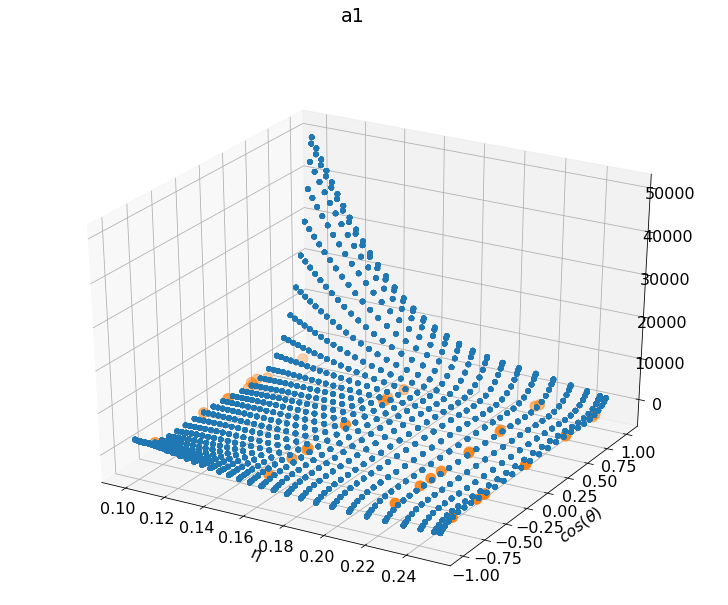

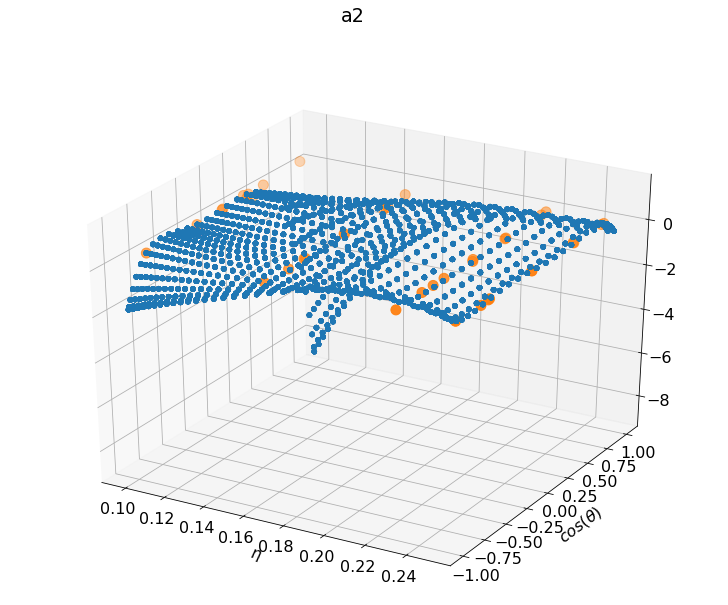

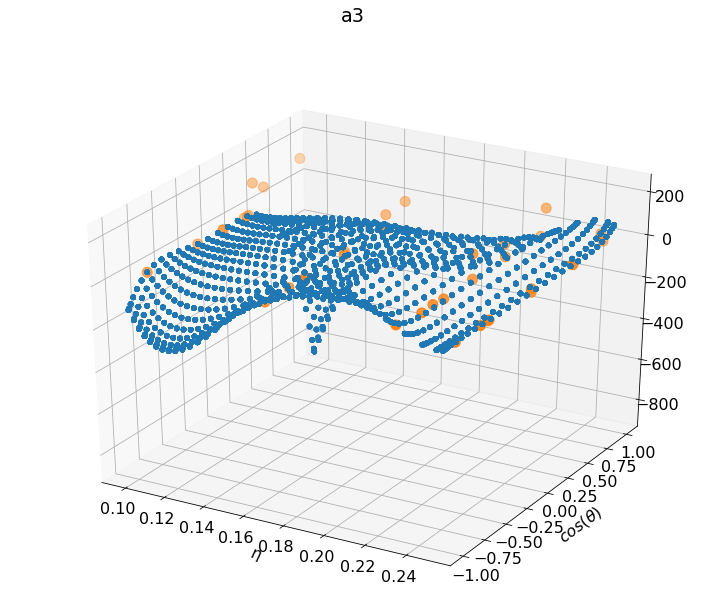

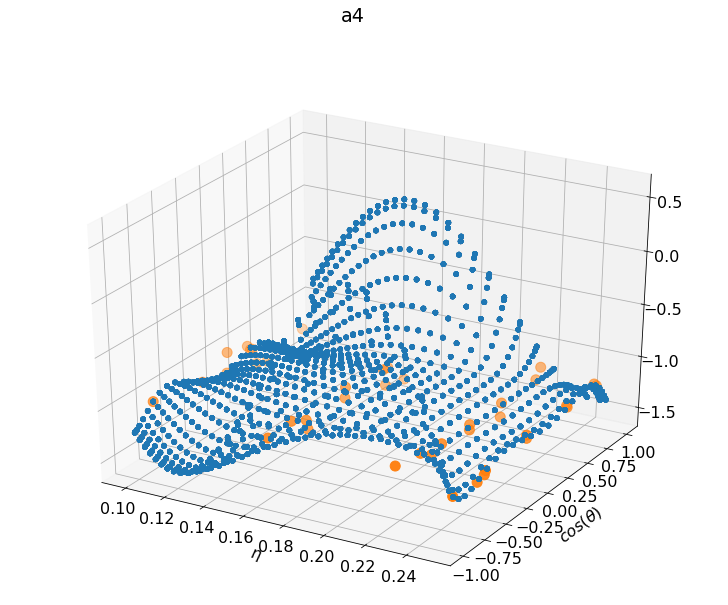

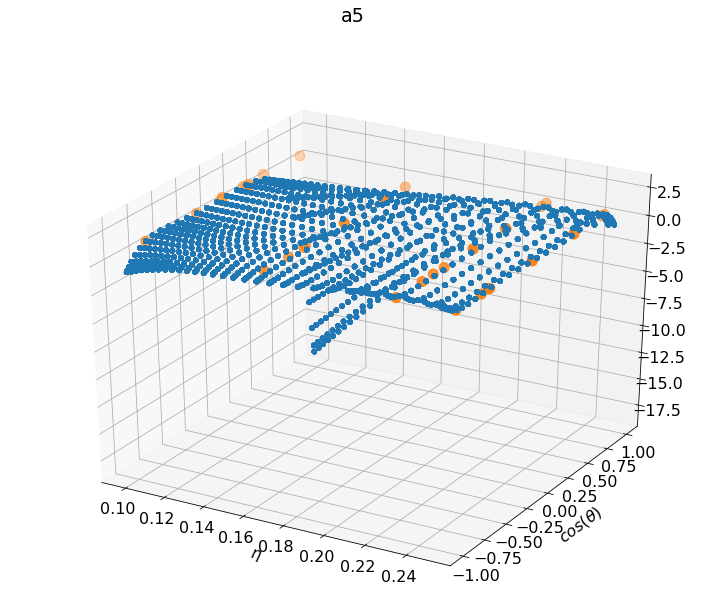

In [682]:
num = 30 
# mass-ratio
qq = np.linspace(1, 8, num)
# eta
ee = phenom.eta_from_q(qq)
# cos(theta)
tt = np.cos(np.linspace(0, 180, num)*np.pi/180)
# tt = np.array([np.cos(45 * np.pi/180)] * num)
# spin mag
# cc = np.linspace(0,1,num)
cc = np.array([0.4] * num)
# cc = np.array([0.8] * num)

xx, yy, zz = np.meshgrid(ee, tt, cc)
xx = xx.ravel()
yy = yy.ravel()
zz = zz.ravel()

XYZ = np.array(list(zip(xx,yy,zz)))

labels=['a1','a2','a3','a4','a5']
for idx in range(5):
    yhat_3d = model_predict(y_fits[idx], XYZ, X_scalers[idx], Y_scalers[idx])
    XY_subspace = XYZ[:,[0,1]]
    XY_data_subspace = psf_coords[:,[0,1]]
#     fig = plt.figure(figsize=(8,7))
    fig = plt.figure(figsize=(6.4*2, 4.8*2))
#     plt.gcf().subplots_adjust(bottom=0.15)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(XY_subspace[:,0], XY_subspace[:,1], yhat_3d)
    ax.scatter(XY_data_subspace[:,0], XY_data_subspace[:,1], psf_y[:,idx], s=100)

    ax.set_xlabel(r"$\eta$", labelpad=5)
    ax.set_ylabel(r"$cos(\theta)$", labelpad=10)
#     ax.xaxis.set_tick_params(labelsize=15)
#     ax.yaxis.set_tick_params(labelsize=15)
#     ax.zaxis.set_tick_params(labelsize=15)
    
    
    # ax.plot_trisurf(XY_subspace[:,0], XY_subspace[:,1], yhat_3d)
    fig.suptitle(f"{labels[idx]}")
#     plt.tight_layout()
    plt.show()
    plt.close()

# to do

 - tidy up the code
 - make two fits
     - 1. high order for 'interpolation'
     - 2. lower order for 'extrapolation'
 - find out how to export the sklearn fit
 - load up fits and compare with best-fit

In [ ]:
# for lower order fit try this
# alpha = 0.0001
# model = make_pipeline(PolynomialFeatures(degree=3), Lasso(alpha=alpha, max_iter=10e6))

In [643]:
# model = make_pipeline(PolynomialFeatures(degree=3), Lasso(alpha=alpha, max_iter=10e6))
# model_lasso = model.named_steps['lasso']
# model_lasso.coef_

In [684]:
import pickle

In [689]:
def save_as_pickle(obj, filename):
    with open(filename + '.save', 'wb') as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

In [690]:
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [691]:
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=10000000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [692]:
save_as_pickle(model, 'model_test')

In [693]:
ls

data/                           psf_amp_x.txt         puck.py
dev.ipynb                       psf_amp_y.txt         __pycache__/
explicit_nr_sim_list.ipynb      psf_phase_x.txt       q1.png
fit-test.ipynb                  psf_phase_y.txt       q2.png
look-at-dphi.ipynb              psf_x.txt             q4.png
model_test.save                 psf_y.txt             q8.png
nrutils-gen-data-for-fit.ipynb  puck-fit-amp.ipynb    run-nohup.md
nrutils-gen-data-for-fit.py     puck-fit-phase.ipynb
output.log                      puck-pfs.ipynb


In [694]:
loaded_model = load_from_pickle('model_test.save')

In [695]:
loaded_model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=10000000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
def save_model(model, reg_name='lasso'):
    poly_feat = model.named_steps['polynomialfeatures']
    feature_names = poly_feat.get_feature_names()
    powers = poly_feat.powers_
    degree = poly_feat.degree
    
    regressor = model.named_steps[reg_name]
    intercept = regressor.intercept_
    coefs = regressor.coef_
    

In [629]:
model = y_fits[0]

In [630]:
model_lasso = model.named_steps['lasso']

In [631]:
model_lasso.intercept_

array([0.21462705])

In [632]:
model_lasso.coef_

array([ 0.00000000e+00,  1.85825868e-02, -6.42390109e-01, -1.23404528e-01,
        4.90430481e-02,  5.21654079e-01, -1.17399901e-01, -2.41306831e-01,
       -1.88229479e-01, -0.00000000e+00,  2.29950428e-02, -1.09858541e-01,
        2.43471501e-01,  2.43487602e-01,  2.74564393e-02,  1.95093615e-06,
       -5.77330572e-02, -6.65275968e-03, -4.13804836e-06, -9.30971716e-02])

In [593]:
model_lasso.alpha

0.0001

In [595]:
model_pf = model.named_steps['polynomialfeatures']

In [621]:
model_pf.n_output_features_

20

In [622]:
model_pf.n_input_features_

3

In [624]:
model_pf.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [620]:
model_pf.degree

3

In [618]:
model_pf.powers_

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [2, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [0, 2, 0],
       [0, 1, 1],
       [0, 0, 2],
       [3, 0, 0],
       [2, 1, 0],
       [2, 0, 1],
       [1, 2, 0],
       [1, 1, 1],
       [1, 0, 2],
       [0, 3, 0],
       [0, 2, 1],
       [0, 1, 2],
       [0, 0, 3]])

In [617]:
# x = 10 * np.random.random(100)
# y = -4 + 2 * x - 3 * x ** 2

# model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1E-8, fit_intercept=True))
# model.fit(x[:, None], y)
# ridge = model.named_steps['ridge']
# print(model.named_steps['polynomialfeatures'].powers_)
# print(ridge.coef_)
# print(ridge.intercept_)